<a href="https://colab.research.google.com/github/MacarenaQuijadaG/Challenge_Telecom2/blob/main/Challenge_Telecom_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Churn de Clientes - Telecom X***

# **1. Importación de bibliotecas**

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(Clientes)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **2-Transformación y Limpieza de datos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [8]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [9]:
df.sample(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4046,5539-HIVAK,No,Female,1,Yes,No,28,Yes,Yes,Month-to-month,...,Mailed check,25.7,734.6,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6713,9243-TUYBL,,Male,1,Yes,No,28,Yes,Yes,Month-to-month,...,Electronic check,105.8,2998,Fiber optic,No,Yes,No,Yes,Yes,Yes
3221,4500-HKANN,No,Male,0,Yes,Yes,23,Yes,Yes,Two year,...,Mailed check,59.7,1414.2,DSL,No,Yes,No,Yes,No,No
5671,7748-UMTRK,No,Female,1,No,Yes,30,Yes,Yes,Month-to-month,...,Electronic check,101.3,2974.5,Fiber optic,No,No,No,Yes,Yes,Yes
4592,6292-TOSSS,No,Male,0,No,No,50,Yes,Yes,Two year,...,Bank transfer (automatic),24.9,1195.25,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2995-UPRYS,Yes,Female,1,Yes,No,40,Yes,No,One year,...,Credit card (automatic),99.2,4062.2,Fiber optic,No,Yes,No,Yes,Yes,Yes
598,0853-NWIFK,No,Female,0,No,No,45,Yes,No,One year,...,Electronic check,100.3,4483.95,Fiber optic,Yes,Yes,No,No,Yes,Yes
2393,3340-QBBFM,No,Male,1,Yes,No,36,Yes,No,One year,...,Credit card (automatic),54.1,1992.85,DSL,No,No,Yes,Yes,No,No
6424,8819-WFGGJ,No,Male,0,Yes,No,68,No,No phone service,Two year,...,Bank transfer (automatic),54.1,3794.5,DSL,Yes,No,Yes,No,Yes,Yes


In [10]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [11]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [12]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [13]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [14]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [15]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [16]:
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [17]:
df.sample(100)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
5208,7109-MFBYV,No,Male,0,No,No,26,Yes,No,Month-to-month,...,DSL,No,No,No,No,No,No,1233.15,45.45,1.515000
4234,5825-XJOCM,No,Male,0,No,Yes,48,Yes,Yes,One year,...,DSL,Yes,Yes,Yes,No,No,No,3035.35,64.40,2.146667
2338,3258-SYSWS,No,Male,1,No,No,72,Yes,Yes,Two year,...,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,7845.80,113.80,3.793333
3131,4365-MSDYN,No,Male,0,Yes,No,8,Yes,No,Month-to-month,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,161.15,19.55,0.651667
5529,7576-OYWBN,Yes,Male,1,No,No,3,Yes,Yes,Month-to-month,...,Fiber optic,No,No,No,No,No,No,231.80,76.05,2.535000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,3842-QTGDL,No,Male,0,Yes,No,16,Yes,No,Month-to-month,...,Fiber optic,Yes,Yes,No,No,No,No,1321.30,80.75,2.691667
6300,8663-UPDGF,No,Female,0,No,No,26,Yes,Yes,Month-to-month,...,DSL,Yes,Yes,No,No,Yes,No,1800.05,69.50,2.316667
5357,7317-GGVPB,Yes,Male,0,Yes,No,71,Yes,Yes,Two year,...,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,7690.90,108.60,3.620000
1904,2692-AQCPF,No,Female,0,Yes,No,65,Yes,Yes,One year,...,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,7118.90,108.05,3.601667


In [18]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [19]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [20]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})
df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [21]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [22]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}
df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)

    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [23]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


In [24]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [25]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [26]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [27]:
df.to_json('Clientes.json', index= False)

# **3- Carga y análisis**

In [28]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

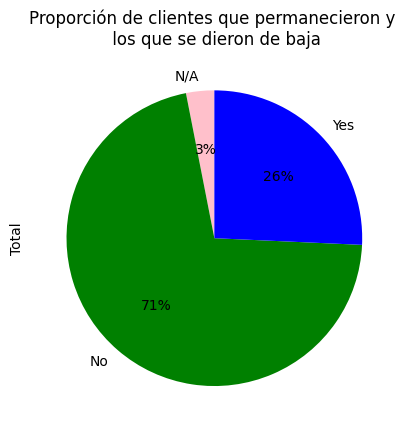

<Figure size 640x480 with 0 Axes>

In [30]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['pink', 'green','blue'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [31]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


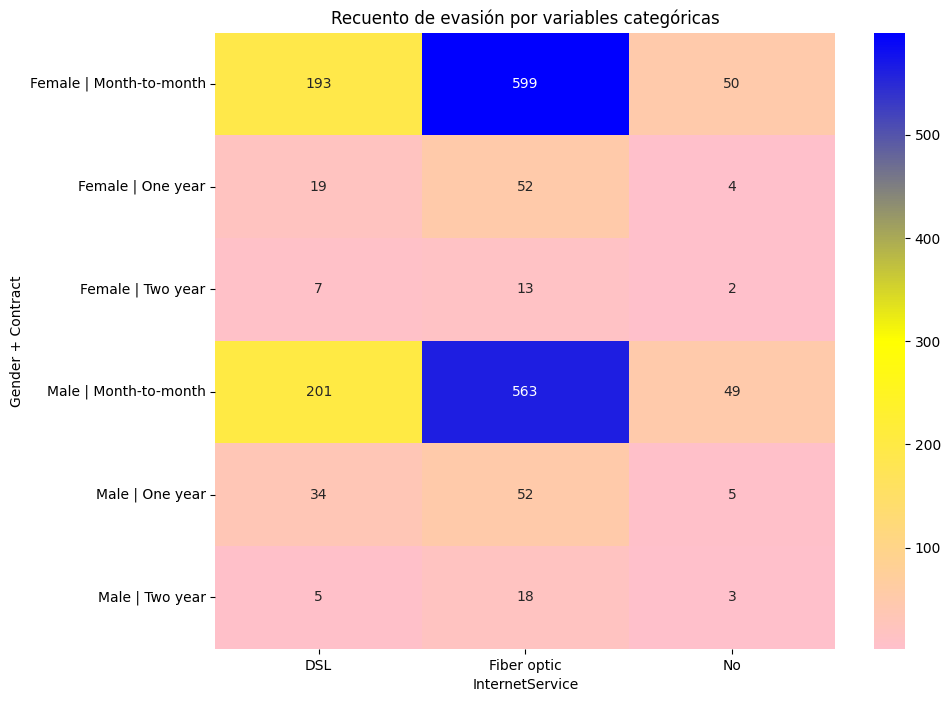

In [32]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["pink", "yellow", "blue"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

In [33]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']
df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


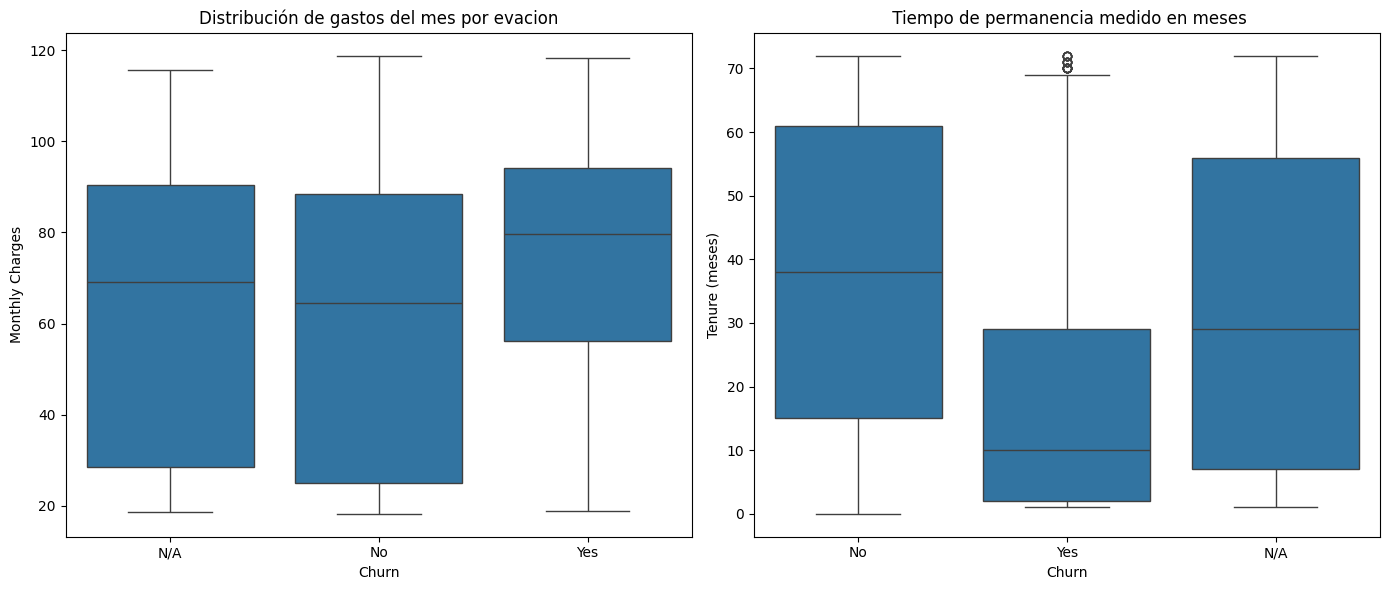

In [34]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

# **Informe de ETL y Análisis Exploratorio – Churn de Clientes - Telecom X**

# Transformación
a) Normalización de datos anidados
Las columnas embebidas (customer, phone, account, internet) se desglosaron y se integraron al DataFrame principal para unificar la estructura.

b) Depuración de datos
Se comprobó que no existían valores faltantes ni registros duplicados en customerID.
Las columnas de tipo object como Charges.Total y Charges.Monthly se transformaron a float.
Tras la conversión, se eliminaron las columnas originales para evitar redundancias.

c) Renombrado y creación de variables
Se ajustaron los nombres de columnas clave para estandarizar la nomenclatura:

'gender' → 'Gender'

'tenure' → 'Tenure'

'customerID' → 'CustomerID'
Además, se añadió la columna DailyCharges, calculada como el cargo mensual dividido por 30.

d) Transformación de variables categóricas
Se recodificaron variables binarias (Partner, Dependents, PhoneService, PaperlessBilling, MultipleLines) a formato 1/0.
También se binarizaron columnas como OnlineSecurity y TechSupport.
Contract se transformó a valores numéricos (Month-to-month = 1, etc.).
Churn se unificó para contener únicamente Yes o No.

# Carga
El DataFrame final procesado se guardó como archivo JSON:

df.to_json('Clientes.json', index=False)
Análisis Exploratorio de Datos
Proporción de abandono
Se generó un gráfico de torta que evidencia que una parte significativa de usuarios cancelaron el servicio.

# Perfil de clientes que desertaron
Se elaboró una tabla y un heatmap para visualizar la distribución combinada:

Gastos mensuales (Monthly Charges): Los clientes que se dieron de baja presentan cargos mensuales más altos en promedio.

Antigüedad (Tenure): Los usuarios que permanecen suelen tener mayor tiempo de permanencia.

Se realizaron boxplots para comparar ChargesMonthly y Tenure según Churn.

# Conclusión
1- Contratos de corta duración, cargos mensuales elevados y menor permanencia se relacionan directamente con la cancelación del servicio. Este hallazgo inicial permite sentar bases sólidas para desarrollar modelos predictivos de abandono y diseñar planes de retención más eficaces.

2️- El tipo de servicio de internet es un factor determinante: quienes cuentan con conexiones como DSL o carecen de servicios complementarios (OnlineSecurity, TechSupport, etc.) figuran con más frecuencia entre quienes cancelan.